In [1]:
from datetime import datetime, timedelta,date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import warnings
warnings.filterwarnings("ignore")

# uplifitng

### Îç∞Ïù¥ÌÑ∞ Î≥ÄÏàò ÏÑ§Î™Ö
* recency : ÎßàÏßÄÎßâ Íµ¨Îß§ ÌõÑ Í∞úÏõî
* history: Í≥ºÍ±∞ Íµ¨Îß§Ïùò $value
* used_discount: Ìï†Ïù∏ ÏÇ¨Ïö© Ïó¨Î∂Ä
* used_bogo: Ïû¨Íµ¨Îß§ ÌñàÎäîÏßÄ Ïó¨Î∂Ä
* zip_code: Suburban/Urban/RuralÍ≥º Í∞ôÏùÄ Ïö∞Ìé∏Î≤àÌò∏ ÌÅ¥ÎûòÏä§
* is_referral: Ï∂îÏ≤ú Ï±ÑÎÑêÏóêÏÑú Í≥†Í∞ùÏùÑ ÌöçÎìùÌñàÎäîÏßÄ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÉÖÎãàÎã§.
* channel: Í≥†Í∞ùÏù¥ ÏÇ¨Ïö©ÌïòÎäî Ï±ÑÎÑê, Phone/Web/Multichannel
* offer: Í≥†Í∞ùÏóêÍ≤å Ï†ÑÏÜ°Îêú Ï†úÏïà, Discount/But One Get One(ÏõêÌîåÎü¨Ïä§Ïõê)/No Offer
* conversation : (1-Íµ¨Îß§ , 0-X)

### Content

This dataset show customer's brief information,
historical use of discount or BOGO(Buy One Get One) promotion,
offer has been made, and the conversion result(buy or not).
The conversion average value = $25

----
* Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™ÖÏóê Îî∞Î•¥Î©¥ discount ÎÇò bogo offerÎ•º Î∞õÏùÄ Í≥†Í∞ùÎì§ÏùÄ Treatment(ÌÉÄÍ≤üÍµ∞) Ïù¥Í≥† ÎÇòÎ®∏ÏßÄÎäî ÌÜµÏ†úÏßëÎã®ÏúºÎ°ú Î≥º Ïàò ÏûàÍ≤†Îã§.



In [ ]:
# !kaggle datasets download -d davinwijaya/customer-retention
!unzip -o /content/customer-retention.zip -d /content

Archive:  /content/customer-retention.zip
  inflating: /content/data.csv       


In [26]:
df= pd.read_csv('/content/uplift.csv')

Ïã§ÌóòÍµ∞Í≥º ÎåÄÏ°∞Íµ∞Ïóê ÎåÄÌïú Ï†ïÎ≥¥Í∞Ä Ï¢Ä Ìó∑Í∞àÎ¶∞Îã§.


In [27]:
df

recency  history  used_discount  used_bogo   zip_code  is_referral  \
0           10   142.44              1          0  Surburban            0   
1            6   329.08              1          1      Rural            1   
2            7   180.65              0          1  Surburban            1   
3            9   675.83              1          0      Rural            1   
4            2    45.34              1          0      Urban            0   
...        ...      ...            ...        ...        ...          ...   
63995       10   105.54              1          0      Urban            0   
63996        5    38.91              0          1      Urban            1   
63997        6    29.99              1          0      Urban            1   
63998        1   552.94              1          0  Surburban            1   
63999        1   472.82              0          1  Surburban            0   

            channel            offer  conversion  
0             Phone  Buy One Get One           0  
1               Web         No Offer           0  
2               Web  Buy One Get One           0  
3               Web         Discount           0  
4               Web  Buy One Get One           0  
...             ...              ...         ...  
63995           Web         Discount           0  
63996         Phone         Discount           0  
63997         Phone         Discount           0  
63998  Multichannel  Buy One Get One           0  
63999           Web         Discount           0  

[64000 rows x 9 columns]

# Îç∞Ïù¥ÌÑ∞ÌÉêÏÉâ

In [ ]:
df.info()

In [ ]:
# Î≤îÏ£ºÌòï Î≥ÄÏàò ÌôïÏù∏
df.describe(include = np.object)

zip_code channel            offer
count       64000   64000            64000
unique          3       3                3
top     Surburban     Web  Buy One Get One
freq        28776   28217            21387

## EDA
 Object Ïª¨Îüº


In [ ]:
df.select_dtypes

In [28]:
def plot_object_columns(df,obejct_columns):
    object_columns = obejct_columns
    # df.select_dtypes(include=['object']).columns

    num_cols = len(object_columns)
    num_rows = 1  # Number of rows for subplots
    figsize = (5 * num_cols, 5)  # Adjust the figure size based on the number of columns

    # Create a subplot grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, col in enumerate(object_columns):
        ax = axes[i] if num_cols > 1 else axes  # Handle single subplot case
        sns.countplot(x=col, data=df, palette="coolwarm_r", order=df[col].value_counts().index, ax=ax)
        ax.set_title(f'Counts for {col}', fontsize=10)
        ax.set_xlabel(col)  # Set xlabel for better readability
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

        # Print value percentages
        percentages = df[col].value_counts() / len(df) * 100
        print(percentages, df[col].value_counts())

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Assuming you have a DataFrame named 'df'
# plot_object_columns(df)


Ïó∞ÏÜçÌòï Î≥ÄÏàò

In [ ]:
plt.hist(df['history'], bins=50)  # 20Í∞úÏùò Íµ¨Í∞ÑÏúºÎ°ú ÎÇòÎàÑÏñ¥ ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
plt.title('Distribution of history')
plt.show()


## Í∞ÄÏÑ§ Í≤ÄÏ†ï

In [29]:
# Ïã§ÌóòÍµ∞,ÎåÄÏ°∞Íµ∞ treatment Ïª¨ÎüºÏùÑ Îî∞Î°ú ÎßåÎì§Ïñ¥Ï£ºÏûê
df['treatment'] = 0
df.loc[df['offer'].isin(['Buy One Get One', 'Discount']), 'treatment'] = 1


In [30]:
df.offer = df.offer.map({'No Offer': 0, 'Buy One Get One': -1, 'Discount': 1}) # 0 Ïù∏Í≤ΩÏö∞ control, -1,1 Ïù∏Í≤ΩÏö∞ Treatment


In [32]:
df

recency  history  used_discount  used_bogo   zip_code  is_referral  \
0           10   142.44              1          0  Surburban            0   
1            6   329.08              1          1      Rural            1   
2            7   180.65              0          1  Surburban            1   
3            9   675.83              1          0      Rural            1   
4            2    45.34              1          0      Urban            0   
...        ...      ...            ...        ...        ...          ...   
63995       10   105.54              1          0      Urban            0   
63996        5    38.91              0          1      Urban            1   
63997        6    29.99              1          0      Urban            1   
63998        1   552.94              1          0  Surburban            1   
63999        1   472.82              0          1  Surburban            0   

            channel  offer  conversion  treatment  
0             Phone     -1           0          1  
1               Web      0           0          0  
2               Web     -1           0          1  
3               Web      1           0          1  
4               Web     -1           0          1  
...             ...    ...         ...        ...  
63995           Web      1           0          1  
63996         Phone      1           0          1  
63997         Phone      1           0          1  
63998  Multichannel     -1           0          1  
63999           Web      1           0          1  

[64000 rows x 10 columns]

In [50]:
df_bogo = df.copy().loc[df.offer <=0].reset_index(drop=True)
df_discount = df.copy().loc[df.offer >= 0 ].reset_index(drop=True)


df_treat_bogo = df_bogo.groupby(['treatment']).agg({'conversion':['mean','sum','count']})
df_treat_discount = df_discount.groupby(['treatment']).agg({'conversion':['mean','sum','count']})

print(df_treat_bogo)
print(df_treat_discount)



          conversion             
                mean   sum  count
treatment                        
0           0.106167  2262  21306
1           0.151400  3238  21387
          conversion             
                mean   sum  count
treatment                        
0           0.106167  2262  21306
1           0.182757  3894  21307


In [47]:
from statsmodels.stats.proportion import proportions_ztest
proportions_ztest(count=df_treat_discount.reset_index()[('conversion')]['sum'].loc[:1],
                  nobs=df_treat_discount.reset_index()[('conversion')]['count'].loc[:1])[1]

5.685165482802317e-112

* treatment(-1) = BOGO ÏõêÌîåÎü¨Ïä§Ïõê Í¥ëÍ≥†Î•º Î∞õÏùÄ Ïã§ÌóòÍµ∞
* treatment(1) = Ìï†Ïù∏ Í¥ëÍ≥†Î•º Î∞õÏùÄ Ïã§ÌóòÍµ∞
* treatment(0) = ÎåÄÏ°∞Íµ∞



In [ ]:
from statsmodels.stats.proportion import proportions_ztest

# Calculate the number of successes (converted) and the total counts for the first two rows
successes = df_treat_discount.reset_index()[('conversion')]['sum'].loc[:1]
counts = df_treat_discount.reset_index()[('conversion')]['count'].loc[:1]

# Perform the z-test using proportions_ztest
_, p_value = proportions_ztest(count=successes, nobs=counts)

print(f"p-value: {p_value}")


p-value: 5.685165482802317e-112


ÎßàÏºÄÌåÖ Ï†úÏïàÏúºÎ°ú BOGO ÏôÄ DsicountÎ•º ÎÇòÎà†ÏÑúÎ≥¥Î©¥ 1:1:1 ÎπÑÏú®Ïù¥ÏßÄÎßå
Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú Ïã§ÌóòÍµ∞Ïù¥ ÎåÄÏ°∞Íµ∞Î≥¥Îã§ 2Î∞∞Ïù¥ÏÉÅ ÎßéÎã§.


## encoding

In [ ]:
# ÏóÖÎ¶¨ÌîÑÌåÖ Î™®Îç∏Î°ú Íµ¨Í∞ÑÏùÑ ÎÇòÎàÑÍ∏∞Ï†Ñ, treatment ÏôÄ targetÏùò Ïó¨Î∂ÄÎ°ú ÏóÖÎ¶¨ÌîÑÌåÖ ÏÑ∏Í∑∏Î®ºÌä∏Î•º ÎÇòÎàå Ïàò ÏûàÎã§.

#CN:
df['target_class'] = 0
#CR:
df.loc[(df.treatment == 0) & (df.target != 0),'target_class'] = 1
#TN:
df.loc[(df.treatment != 0) & (df.target == 0),'target_class'] = 2
#TR:
df.loc[(df.treatment != 0) & (df.target != 0),'target_class'] = 3

df['target_class'].value_counts()

In [52]:
# Î≤îÏ£ºÌòï Î≥ÄÏàò one hot encoding
df_model = pd.get_dummies(df)


In [53]:
# target Î≥ÄÏàò
df_bogo = df_model.copy().loc[df_model.offer <=0].reset_index(drop=True) # ÏõêÌîåÏõê Í¥ëÍ≥†Î•º Î∞õÏùÄ Ïã§ÌóòÍµ∞Í≥º ÎåÄÏ°∞Íµ∞ DATA
df_discount = df_model.copy().loc[df_model.offer >=0].reset_index(drop=True) # Ìï†Ïù∏ Í¥ëÍ≥†Î•º Î∞õÏùÄ Ïã§ÌóòÍµ∞Í≥º ÎåÄÏ°∞Íµ∞ DATA

In [74]:
print(len(df_discount))
print(len(df_bogo))

42613
42693


## 2. Approaches with two models

The two-model approach can be found in almost any uplift modeling work and is often used as a baseline. However, using two models can lead to some unpleasant consequences: if you use fundamentally different models for training, or if the nature of the test and control group data is very different, then the scores returned by the models will not be comparable. As a result, the calculation of the uplift will not be completely correct. To avoid this effect, you need to calibrate the models so that their scores can be interpolated as probabilities. The calibration of model probabilities is described perfectly in [scikit-learn documentation](https://scikit-learn.org/stable/modules/calibration.html).

### 2.1 Two independent models

The main idea is to estimate the conditional probabilities of the treatment and control groups separately.

1. Train the first model using the treatment set.
2. Train the second model using the control set.
3. Inference: subtract the control model scores from the treatment model scores.

<p align= "center">
  <img src="https://raw.githubusercontent.com/maks-sh/scikit-uplift/master/docs/_static/images/TwoModels_vanila.png" alt="Two Models vanila"/>
</p>

In [55]:
train, test  = train_test_split(df_discount, test_size=0.2, random_state=42, stratify = df_discount['treatment'])

# Ï£ºÏñ¥ÏßÑ ÌîºÏ≤ò Î¶¨Ïä§Ìä∏
features = ['recency',	'history',	'used_discount',	'used_bogo',	'is_referral'	,	'zip_code_Rural',	'zip_code_Surburban',	'zip_code_Urban',	'channel_Multichannel',	'channel_Phone'	,'channel_Web']

# ÌîºÏ≤ò Î∞è ÌÉÄÍ≤üÏùÑ ÏÑ§Ï†ïÌïòÍ≥† Îç∞Ïù¥ÌÑ∞Î•º Î∂ÑÌï†
X = train[features]  # train Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÌîºÏ≤ò Ï∂îÏ∂ú
y = train['conversion']
treatment = train['treatment']

# Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
X_train, X_val, y_train, y_val, treat_train, treat_val = train_test_split(
    X, y, treatment, test_size=0.2, random_state=42
)

In [9]:
!pip install scikit-uplift

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.1/42.1 kB 1.2 MB/s eta 0:00:00


[LightGBM] [Info] Number of positive: 1449, number of negative: 12173
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 13622, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.106372 -> initscore=-2.128347
[LightGBM] [Info] Start training from score -2.128347
[LightGBM] [Info] Number of positive: 2469, number of negative: 11181
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 286
[LightGBM] [Info] Number of data points in the train set: 13650, number of used features: 11
[LightGBM] [Info

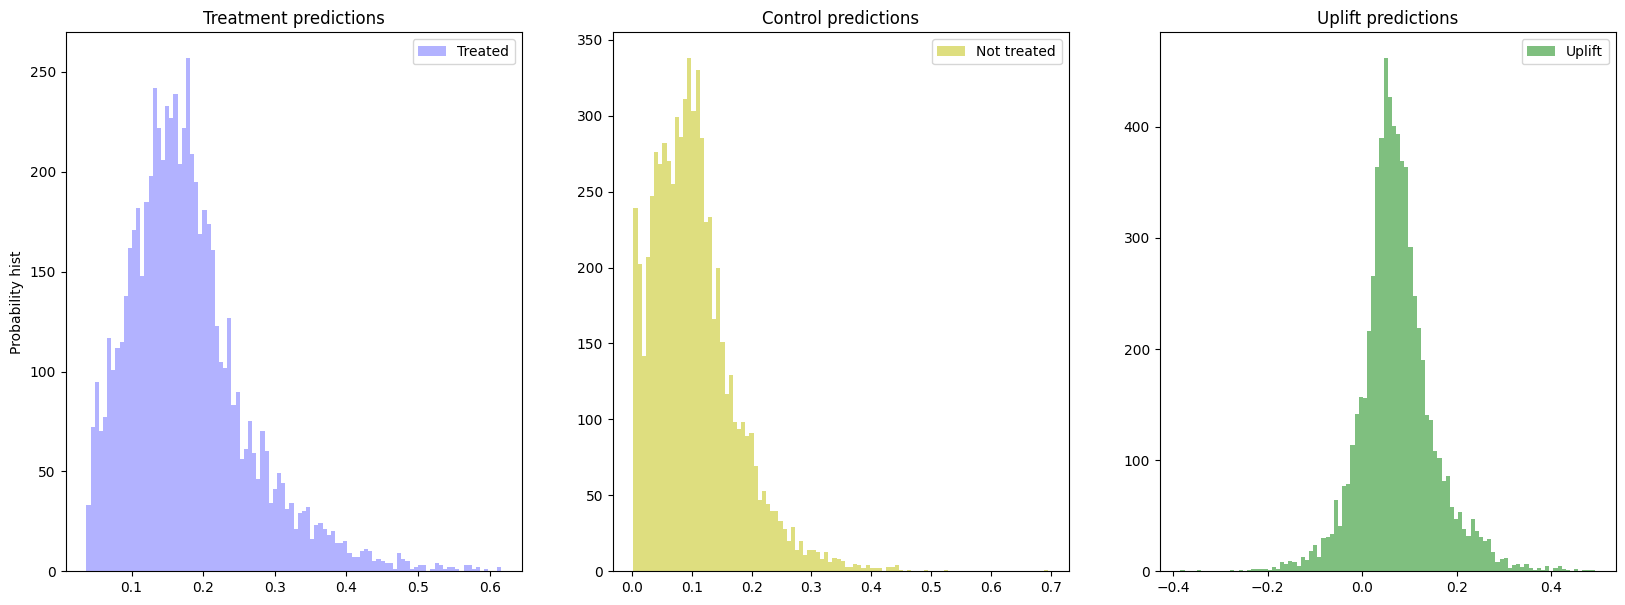

In [56]:
import lightgbm as lgb

from sklift.models import TwoModels
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds


models_results = {
    'approach': [],
    'uplift@30%': []
}

lgb_params = {
    'objective': 'binary',
    'boosting_type': 'gbdt',
    'metric': 'binary_logloss'
}

# TwoModels Î™®Îç∏ ÏÑ§Ï†ï
tm = TwoModels(
    estimator_trmnt=lgb.LGBMClassifier(**lgb_params),
    estimator_ctrl=lgb.LGBMClassifier(**lgb_params),
    method='vanilla'
)

# 3. Î™®Îç∏ ÌïôÏäµ
tm = tm.fit(
    X_train, y_train, treat_train
)

# 4. ÏóÖÎ¶¨ÌîÑÌåÖ ÏòàÏ∏°
uplift_tm = tm.predict(X_val)

tm_score = uplift_at_k(y_true=y_val, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.3)
models_results['approach'].append('TwoModels')
models_results['uplift@30%'].append(tm_score)

# 5. ÏóÖÎ¶¨ÌîÑÌåÖ Ï∏°Ï†ï
plot_uplift_preds(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_);

ÎßàÏºÄÌåÖ ÏúºÎ°ú bogo Î•º Ïù¥Ïö©Ìïú Í≤ΩÏö∞ , [Uplift predictions] Ï†ÑÎ∞òÏ†ÅÏúºÎ°ú Ï†ïÍ∑úÎ∂ÑÌè¨ÌòïÌÉúÎ•º ÎùÑÍ≥†ÏûàÎã§. 0Ïù¥ÏÉÅÏùò Ïä§ÏΩîÏñ¥Î•º Í∞ñÎäî Í≥†Í∞ùÍµ∞Îì§Ïù¥ ÎßéÏïÑÎ≥¥Ïù¥ÎäîÎç∞ ÌïúÎ≤à Î¥êÎ≥¥Ïûê!

In [ ]:
df_uplift = pd.DataFrame({'uplift_score': np.array(uplift_tm)})
df_uplift

In [57]:
df_discount = df_discount[features]
uplift_full = tm.predict(df_discount)  # Ï†ÅÏö©
df_discount['score'] = uplift_full

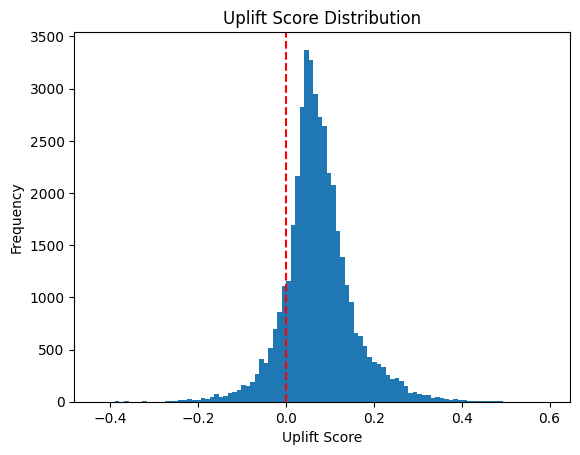

In [60]:
plt.hist(df_discount['score'], bins=100)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Uplift')
plt.xlabel('Uplift Score')
plt.ylabel('Frequency')
plt.title('Uplift Score Distribution')
plt.show()

In [ ]:
df_discount

In [61]:
# score Í∞Ä 0 Ïù¥ÏÉÅÏù∏

score_count = df_discount[df_discount['score'] >= 0]['score'].count()
total_count = len(df_discount)

positive_score_ratio = score_count / total_count
print("Positive Score Ratio:", positive_score_ratio)


Positive Score Ratio: 0.8738413160303193


In [66]:
# ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
threshold = 0.2

# Pesuadables Í∑∏Î£πÏúºÎ°ú Í∞ÑÏ£ºÎêòÎäî Îç∞Ïù¥ÌÑ∞ Í∞úÏàò Í≥ÑÏÇ∞
pesuadables_count = len(df_discount[df_discount['score'] >= threshold])

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Í∞úÏàò
total_count = len(df_discount)

# Pesuadables Í∑∏Î£πÏùò ÎπÑÏú® Í≥ÑÏÇ∞
pesuadables_ratio = pesuadables_count / total_count

print("Pesuadables Í∑∏Î£π ÎπÑÏú®:", pesuadables_ratio)
print(total_count)

Pesuadables Í∑∏Î£π ÎπÑÏú®: 0.06162438692417807
42613


###  scoreÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏÑ∏Í∑∏Î®ºÌä∏Î•º Ïñ¥ÎñªÍ≤å ÎÇòÎà†ÏïºÌïòÏßÄ?

>‚úîÔ∏è skewness Îäî ÎÜíÏßÄ ÏïäÏßÄÎßå ÏïΩ 87% Ïú†Ï†ÄÏùò scoreÍ∞Ä 0.0 Ïù¥ÏÉÅÏùÑ Í∏∞Î°ùÌñàÎã§.
ÏóÖÎ¶¨ÌîÑÌåÖ ÏÇ¨Î∂ÑÎ©¥Ïóê Îî∞Îùº ÏÑ∏Í∑∏Î®ºÌÑ∞Î•º ÎÇòÎà†ÏïºÌïòÎäîÎç∞, Ïñ¥Îñ§ Í∏∞Ï§ÄÏúºÎ°ú ÎÇòÎà†ÏïºÌï†Íπå..?

> score Í∞Ä ÎÜíÏùÑ ÏàòÎ°ù Pesuadables Í≥†Í∞ùÏúºÎ°ú Î¥êÏïºÌïòÎäîÍ≤É Í∞ôÏùÄÎç∞  Í∑∏ ÎÜíÎã§Îäî Í∏∞Ï§ÄÏùÑ Ïñ¥ÎîîÎ°ú Ïû°ÏïÑÏïº ÌïòÎäîÏßÄ Ìó∑Í∞àÎ¶∞Îã§!

### ü§îÍ≤∞Î°†!
ÏùºÎã® ÌÅ¨Í≤å ÏπòÏö∞Ï≥êÏßÄÏßÄ ÏïäÍ≥†,
* score Í∞Ä 0 Ïù¥ÏÉÅÏù∏Í≤ΩÏö∞ 87%
* 0.1 Ïù∏Í≤ΩÏö∞, 23%
* 0.2 Ïù∏ Í≤ΩÏö∞ 2.5%
* 0.3 Î∂ÄÌÑ∞Îäî 0.2 %Î°ú Îß§Ïö∞ Ï†ÅÎã§.
* scroeÍ∞Ä ÏùåÏàòÏù∏ Í≤ΩÏö∞Îäî 13% Í∞Ä ÏûàÏùå.

ÌÅ¨Í≤å 4Í∞ÄÏßÄÎ°ú Î∂ÑÎ•òÌï† Ïàò Îäî ÏóÜÏùÑ Í≤É Í∞ôÏßÄÎßå, ÌôïÏã§ÌïúÍ±¥ Ìï¥Îãπ Í¥ëÍ≥†Ïãú Î∂ÄÏ†ïÏ†ÅÏù∏ ÏòÅÌñ•ÏùÑ ÎÅºÏπ† ÏÑ∏Í∑∏Î®ºÌä∏Îäî ÌôïÏã§Ìûà ÎÇòÎàå Ïàò ÏûàÎã§ÎäîÍ≤É!

> ÏùºÎã®ÏùÄ 0 =< surething < 0.1  Ïù∏Í≤ΩÏö∞ SureThings \
0.1 Ïù¥ÏÉÅÏù∏Í≤ΩÏö∞ Persuadables , ÏùåÏàòÏù∏Í≤ΩÏö∞ Lost Causes Î°ú ÎÇòÎàÑÏóàÎã§.



In [77]:
def segment_customers(score):
    if score >= 0 and score < 0.1:
        return "Sure Things"
    elif score >= 0.1:
        return "Persuadables"
    elif score >= -0.1 and score < 0:
        return "Lost Causes"
    else:
        return "Sleeping dogs"

df_discount['segment'] = df_discount['score'].apply(segment_customers)
df_discount['segment'].value_counts()

Sure Things      24450
Persuadables     12787
Lost Causes       4614
Sleeping dogs      762
Name: segment, dtype: int64

Sure Things      57.376857
Persuadables     30.007275
Lost Causes      10.827682
Sleeping dogs     1.788187
Name: segment, dtype: float64 Sure Things      24450
Persuadables     12787
Lost Causes       4614
Sleeping dogs      762
Name: segment, dtype: int64


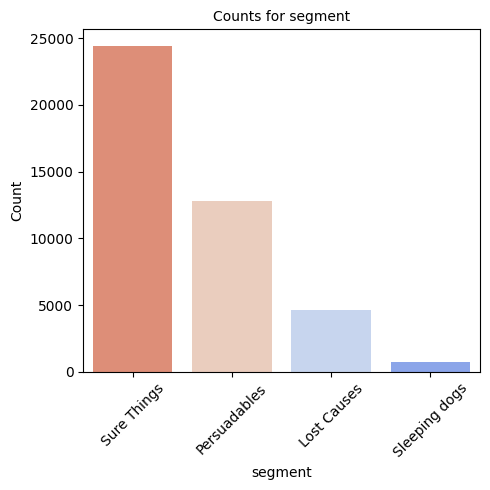

In [78]:
plot_object_columns(df_discount,['segment'])

# Í≤∞Í≥º
uplift scoreÎ•º Í∏∞Ï§ÄÏúºÎ°ú 42613Î™ÖÏùò Ïò§ÎîîÏñ∏Ïä§Î•º ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÎÑ§ Í∞úÏùò ÏÑ∏Í∑∏Î®ºÌä∏Î°ú Íµ¨Î∂ÑÌïú Í≤∞Í≥º

||Ïò§ÎîîÏñ∏Ïä§Í∑úÎ™®|
|:---:|:---:|
|Sure Things|24450|
|Persuadables |12787|
|Lost Causes |4614|
|Sleeping dogs|762|

Ïïû Ìè¨Ïä§ÌåÖÏóêÏÑú ÏÑ§Î™ÖÌïú Î∂ÑÎ•ò Ïù¥Î°†Ïóê Îî∞Î•¥Î©¥, ÏïûÏÑú ÏßÑÌñâÌïú Ìï†Ïù∏ Ï∫†ÌéòÏù∏ Ïò§ÎîîÏñ∏Ïä§ Ï§ë Í¥ëÍ≥† Ï¶ùÎåÄÌö®Í≥ºÍ∞Ä ÌÅ∞ Í≥†Í∞ùÎì§ÏùÄ `Pesuadables` Í≥†Í∞ùÎì§ÏûÖÎãàÎã§.

>* ÎßåÏïΩ Ï†ÑÏ≤¥ Í≥†Í∞ùÎì§ÏùÑ ÌÉÄÍ≤üÌï¥ÏÑú Í¥ëÍ≥†Î•º ÌñàÏùÑ Ïãú
100 * 42613 = 4,261,300 Ïõê
* `Pesuadables`  Í≥†Í∞ùÎì§Îßå ÌÉÄÍ≤üÌï¥ÏÑú Í¥ëÍ≥†Î•º ÌñàÏùÑ Ïãú  
100 * 12787 = 1,278,700 Ïõê


>*  Î™®Îì† Í≥†Í∞ùÎì§ÏóêÍ≤å Í¥ëÍ≥†ÎπÑÎ•º Ïì∞ÏßÄ ÏïäÍ≥†, **Í¥ëÍ≥† Ï¶ùÎåÄÌö®Í≥ºÍ∞Ä ÌÅ¥Í±∞ÎùºÍ≥† ÏòàÏ∏°Îêú Í≥†Í∞ùÎì§**ÏóêÍ≤åÎßå ÏÇ¨Ïö©Ïãú, ÏïΩ **70%, 2,982,600Ïõê** **Ï†àÍ∞ê**Ìï† Ïàò ÏûàÏäµÎãàÎã§.
* Ìï¥Îãπ Ï∫†ÌéòÏù∏ÏùÑ ÌäπÌûà **ÌîºÌï¥ÏÑú ÏßÑÌñâÌï¥ÏïºÌïòÎäî Í≥†Í∞ùÎì§**Ïùò Í≤ΩÏö∞ 5,376 Î™ÖÏûÖÎãàÎã§! ÏúÑ Í≥†Í∞ùÎì§Îßå Ï†úÏô∏Ìï¥ÏÑú Ï∫†ÌéòÏù∏ÏùÑ ÏßÑÌñâ ÏãúÏºúÎèÑ **537,600Ïõê** **Ï†àÍ∞ê**Ìï† Ïàò ÏûàÏäµÎãàÎã§.

In [81]:
df_discount_a = df.copy().loc[df.offer >= 0 ].reset_index(drop=True)
df_discount_a

recency  history  used_discount  used_bogo   zip_code  is_referral  \
0            6   329.08              1          1      Rural            1   
1            9   675.83              1          0      Rural            1   
2            9   675.07              1          1      Rural            1   
3            2   101.64              0          1      Urban            0   
4            4   241.42              0          1      Rural            1   
...        ...      ...            ...        ...        ...          ...   
42608        7    86.46              0          1      Urban            0   
42609       10   105.54              1          0      Urban            0   
42610        5    38.91              0          1      Urban            1   
42611        6    29.99              1          0      Urban            1   
42612        1   472.82              0          1  Surburban            0   

            channel  offer  conversion  treatment  
0               Web      0           0          0  
1               Web      1           0          1  
2             Phone      1           0          1  
3               Web      1           1          1  
4      Multichannel      0           0          0  
...             ...    ...         ...        ...  
42608           Web      1           0          1  
42609           Web      1           0          1  
42610         Phone      1           0          1  
42611         Phone      1           0          1  
42612           Web      1           0          1  

[42613 rows x 10 columns]

In [ ]:
df_discount_a['segement'] = df_discount['segment']
df_discount_a

In [ ]:
df_persu = df_discount_a[df_discount_a['segement'] == 'Persuadables']
df_sure = df_discount_a[df_discount_a['segement'] == 'Sure Things']

df_persu

In [ ]:
plot_object_columns(df_persu,['used_bogo','zip_code','used_discount','used_bogo','channel','recency'])